Module 1 

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
base_dir = "dermalscan_AI"
categories = ["wrinkles", "dark_spots", "puffy_eyes", "clear_skin"]

In [32]:
data = []

for label in categories:
    folder = os.path.join(base_dir, label)
    print("Reading:", folder)
if os.path.exists(folder):
    for file in os.listdir(folder):
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            data.append([file, label])

df = pd.DataFrame(data, columns=["filename", "label"])
df.to_csv("labels.csv", index=False)
df.head()

Reading: dermalscan_AI\wrinkles
Reading: dermalscan_AI\dark_spots
Reading: dermalscan_AI\puffy_eyes
Reading: dermalscan_AI\clear_skin


,filename,label


In [33]:
import os
import pandas as pd

base_dir = "." 
categories = ["wrinkles", "dark_spots", "puffy_eyes", "clear_skin"]

data = []

print("Starting to scan folders...")

for label in categories:
    folder = os.path.join(base_dir, label)
    
    if os.path.exists(folder):
        # Count files to make sure we found them
        files = [f for f in os.listdir(folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
        print(f"Found {len(files)} images in: {label}")
        
        for file in files:
            data.append([file, label])
    else:
        print(f"ERROR: Could not find folder: {folder}")

df = pd.DataFrame(data, columns=["filename", "label"])

print("-" * 30)
print(f"Total images loaded: {len(df)}")

Starting to scan folders...
ERROR: Could not find folder: .\wrinkles
ERROR: Could not find folder: .\dark_spots
ERROR: Could not find folder: .\puffy_eyes
ERROR: Could not find folder: .\clear_skin
------------------------------
Total images loaded: 0


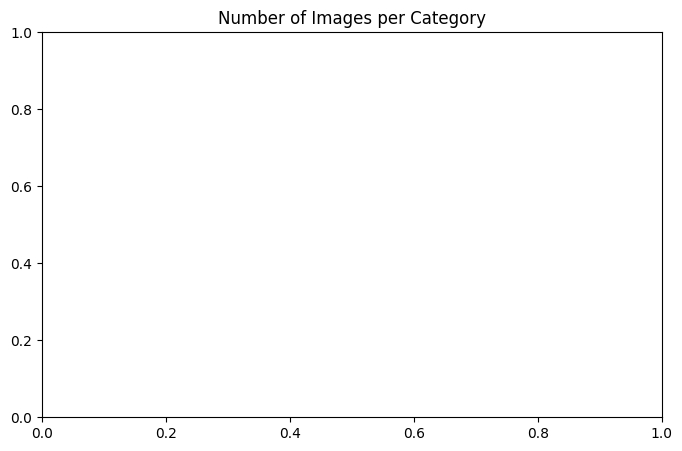

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Number of Images per Category')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

X = df['filename']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Split Successful!")
print(f"Training images: {len(X_train)}")
print("-" * 30)
print(f"Testing images:  {len(X_test)}")
print("-" * 30)
print("\nTraining Set Balance:")
print(y_train.value_counts())

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

Module 2 

Found 963 images belonging to 7 classes.


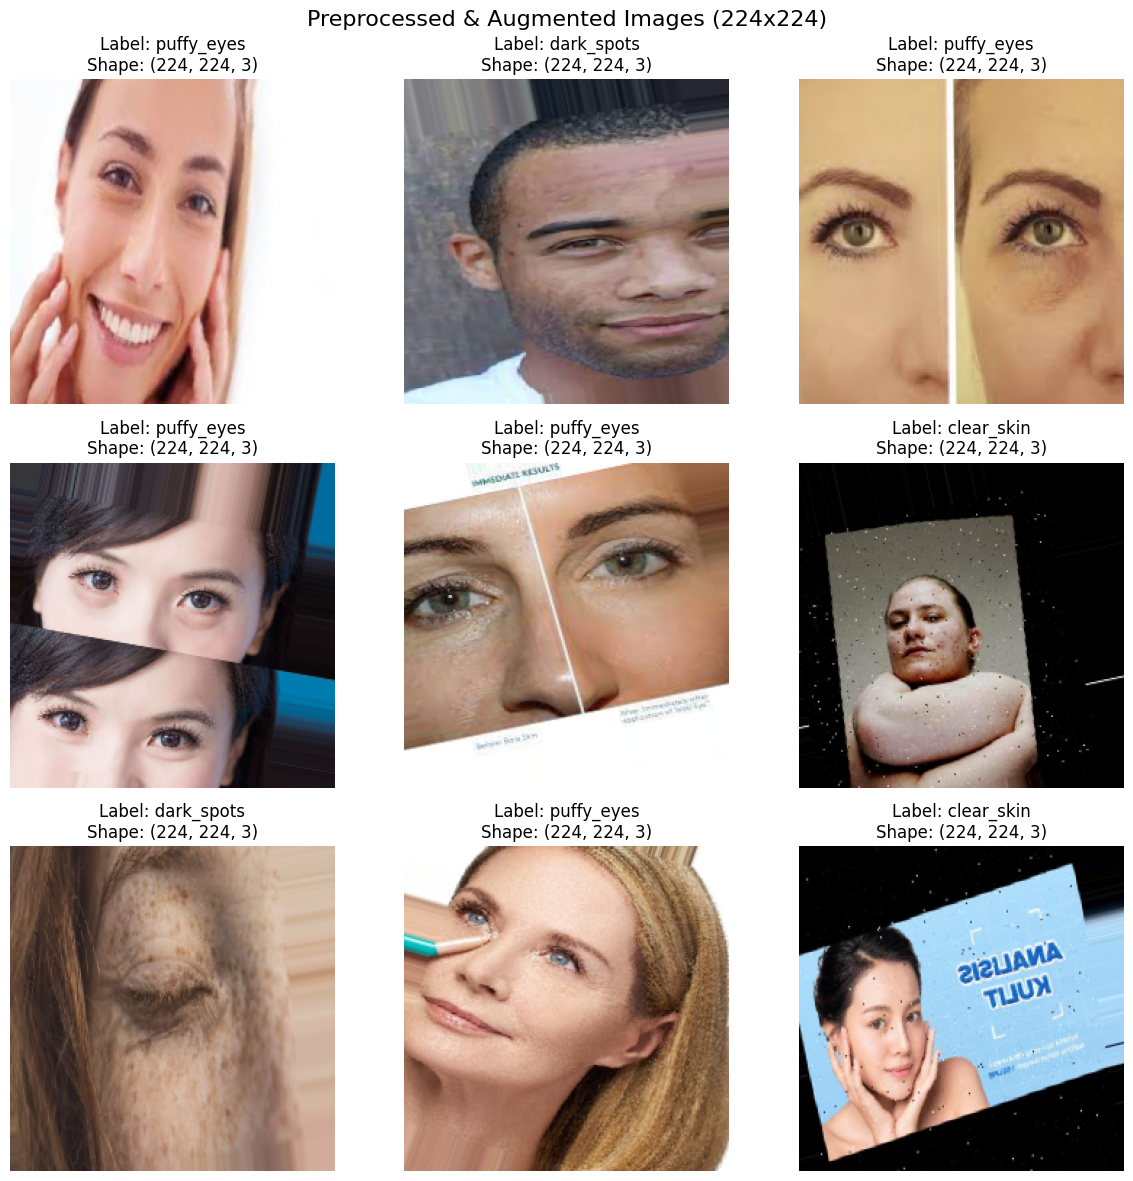

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
DATA_DIR = "." 

train_datagen = ImageDataGenerator(
    rescale=1./255,             
    rotation_range=20,         
    zoom_range=0.2,            
    horizontal_flip=True,       
    width_shift_range=0.1,     
    height_shift_range=0.1,     
    fill_mode='nearest',        
    validation_split=0.2        
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical',            # THIS performs One-Hot Encoding
    subset='training',
    shuffle=True
)

def visualize_augmentation(generator):
  
    x_batch, y_batch = next(generator)

    class_dict = generator.class_indices
    label_map = {v: k for k, v in class_dict.items()}

    plt.figure(figsize=(12, 12))
    plt.suptitle("Preprocessed & Augmented Images (224x224)", fontsize=16)

    for i in range(9): 
        plt.subplot(3, 3, i + 1)
        
        # Display image
        plt.imshow(x_batch[i])
        class_index = np.argmax(y_batch[i])
        class_name = label_map[class_index]
        
        plt.title(f"Label: {class_name}\nShape: {x_batch[i].shape}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
try:
    visualize_augmentation(train_generator)
except Exception as e:
    print(f"Error: Could not visualize. Make sure 'DATA_DIR' points to a folder containing class subfolders. \nError details: {e}")

Found 240 images belonging to 7 classes.


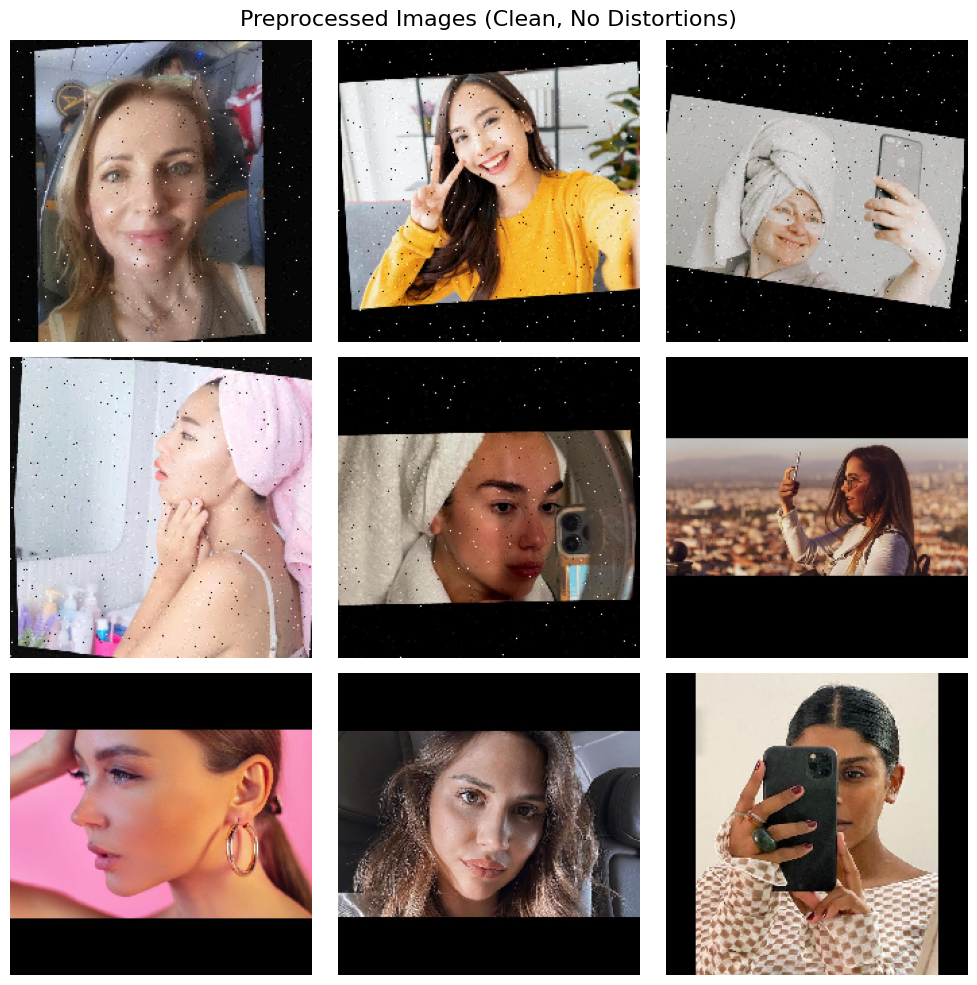

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Settings
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
DATA_DIR = "."  


preprocess_datagen = ImageDataGenerator(
    rescale=1./255,          
    validation_split=0.2     
)

# 2. Load Images
val_generator = preprocess_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',     
    shuffle=False            
)

x_batch, y_batch = next(val_generator)
plt.figure(figsize=(10, 10))
plt.suptitle("Preprocessed Images (Clean, No Distortions)", fontsize=16)

for i in range(min(9, len(x_batch))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Found 963 images belonging to 7 classes.


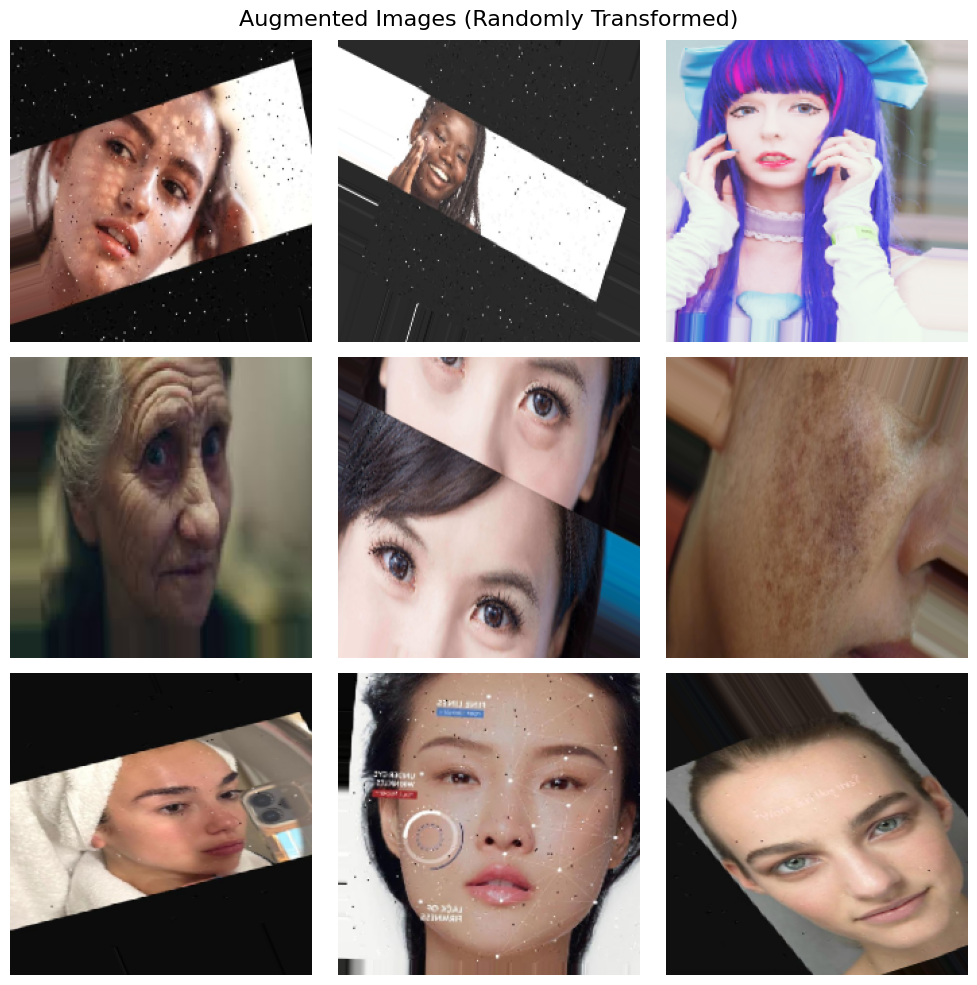

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
DATA_DIR = "."  

augment_datagen = ImageDataGenerator(
    rescale=1./255,             
    rotation_range=30,         
    zoom_range=0.3,             
    horizontal_flip=True,     
    width_shift_range=0.1,     
    height_shift_range=0.1,    
    fill_mode='nearest',        
    validation_split=0.2
)

train_generator = augment_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',          
    shuffle=True                
)

x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
plt.suptitle("Augmented Images (Randomly Transformed)", fontsize=16)

for i in range(min(9, len(x_batch))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Module 3 

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt

NUM_CLASSES = 4  
IMG_SIZE = 224
dataset_path = r"C:\Users\Admin\OneDrive\Desktop\Module1\dataset" 

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    label_mode='categorical' 
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    label_mode='categorical'
)


base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(NUM_CLASSES, activation='softmax') 
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=val_ds, epochs=9)

Found 1203 files belonging to 4 classes.
Using 963 files for training.
Found 1203 files belonging to 4 classes.
Using 240 files for validation.
Epoch 1/9
31/31 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.6002 - loss: 1.0177 - val_accuracy: 0.7167 - val_loss: 0.7673
Epoch 2/9
31/31 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7819 - loss: 0.6238 - val_accuracy: 0.8000 - val_loss: 0.6101
Epoch 3/9
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8307 - loss: 0.5160 - val_accuracy: 0.8083 - val_loss: 0.5485
Epoch 4/9
31/31 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8422 - loss: 0.4471 - val_accuracy: 0.8333 - val_loss: 0.5111
Epoch 5/9
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8619 - loss: 0.4044 - val_accuracy: 0.8333 - val_loss: 0.4908
Epoch 6/9
31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8775 - loss: 0.3787 - val_accuracy: 0.8292 - val_loss: 0.4790
Epoch 7/9
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8899 - loss: 0.3629 - val_accuracy: 0.8417 

Model saved successfully as dermalscan_model.h5


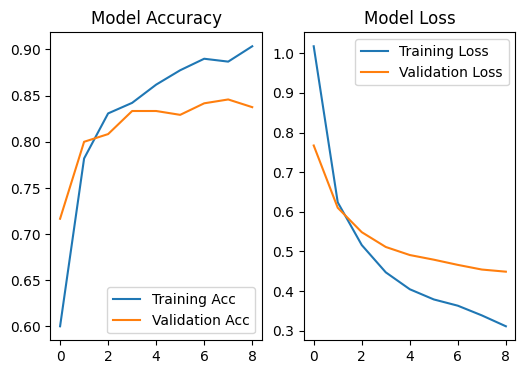

In [45]:
model.save('dermalscan_model.h5')
print("Model saved successfully as dermalscan_model.h5")

# Plotting Accuracy
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Model Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()